In [1]:
# Import libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
import sys, time

In [2]:
# Crop image, gauss filter, 
# median filter, average filter, convolution filtering

def cropImage(image):
   pass

def gausBlur(image, blur, m):
    gauss_filtered_image = cv.GaussianBlur(image, (m, m), blur)
    return gauss_filtered_image

def medBlur(image, shift):
    median_filtered_image = cv2.medianBlur(image, shift)
    return median_filtered_image

def averageFilter(image, shift):
    average_filtered_image = cv2.blur(image, (shift, shift))
    return average_filtered_image

def convolutionFilter(image):
    kernel = np.ones((3, 3), np.float32)
    convolution_filtered_image = cv2.filter2D(image, -1, kernel)
    return convolution_filtered_image

In [3]:
# bicubic interpolation

def interpolationKernel(s, a):
    if (abs(s) >= 0) & (abs(s) <= 1):
        return (a+2)*(abs(s)**3)-(a+3)*(abs(s)**2)+1
        
    elif (abs(s) > 1) & (abs(s) <= 2):
        return a*(abs(s)**3)-(5*a)*(abs(s)**2)+(8*a)*abs(s)-4*a
    
    return 0

def padding(img, H, W, C):
    zimg = np.zeros((H+4, W+4, C))
    zimg[2:H+2, 2:W+2, :C] = img
      
    # Pad the first/last two col and row
    zimg[2:H+2, 0:2, :C] = img[:, 0:1, :C]
    zimg[H+2:H+4, 2:W+2, :] = img[H-1:H, :, :]
    zimg[2:H+2, W+2:W+4, :] = img[:, W-1:W, :]
    zimg[0:2, 2:W+2, :C] = img[0:1, :, :C]
      
    # Pad the missing eight points
    zimg[0:2, 0:2, :C] = img[0, 0, :C]
    zimg[H+2:H+4, 0:2, :C] = img[H-1, 0, :C]
    zimg[H+2:H+4, W+2:W+4, :C] = img[H-1, W-1, :C]
    zimg[0:2, W+2:W+4, :C] = img[0, W-1, :C]
      
    return zimg

#
def bicubicInterpolation(img, ratio, a):
  
    # Get image size
    H, W, C = img.shape
  
    # Here H = Height, W = weight,
    # C = Number of channels if the
    # image is coloured.
    img = padding(img, H, W, C)
  
    # Create new image
    dH = math.floor(H*ratio)
    dW = math.floor(W*ratio)
  
    # Converting into matrix
    dst = np.zeros((dH, dW, 3))
  
    # np.zeroes generates a matrix
    # consisting only of zeroes
    # Here we initialize our answer
    # (dst) as zero
  
    h = 1/ratio
  
    print('Start bicubic interpolation')
    print('It will take a little while...')
    inc = 0
  
    for c in range(C):
        for j in range(dH):
            for i in range(dW):
  
                # Getting the coordinates of the
                # nearby values
                x, y = i * h + 2, j * h + 2
  
                x1 = 1 + x - math.floor(x)
                x2 = x - math.floor(x)
                x3 = math.floor(x) + 1 - x
                x4 = math.floor(x) + 2 - x
  
                y1 = 1 + y - math.floor(y)
                y2 = y - math.floor(y)
                y3 = math.floor(y) + 1 - y
                y4 = math.floor(y) + 2 - y
  
                # Considering all nearby 16 values
                mat_l = np.matrix([[interpolationKernel(x1, a), interpolationKernel(x2, a), interpolationKernel(x3, a), interpolationKernel(x4, a)]])
                mat_m = np.matrix([[img[int(y-y1), int(x-x1), c],
                                    img[int(y-y2), int(x-x1), c],
                                    img[int(y+y3), int(x-x1), c],
                                    img[int(y+y4), int(x-x1), c]],
                                   [img[int(y-y1), int(x-x2), c],
                                    img[int(y-y2), int(x-x2), c],
                                    img[int(y+y3), int(x-x2), c],
                                    img[int(y+y4), int(x-x2), c]],
                                   [img[int(y-y1), int(x+x3), c],
                                    img[int(y-y2), int(x+x3), c],
                                    img[int(y+y3), int(x+x3), c],
                                    img[int(y+y4), int(x+x3), c]],
                                   [img[int(y-y1), int(x+x4), c],
                                    img[int(y-y2), int(x+x4), c],
                                    img[int(y+y3), int(x+x4), c],
                                    img[int(y+y4), int(x+x4), c]]])
                mat_r = np.matrix(
                    [[interpolationKernel(y1, a)], [interpolationKernel(y2, a)], [interpolationKernel(y3, a)], [interpolationKernel(y4, a)]])
                  
                # Here the dot function is used to get the dot 
                # product of 2 matrices
                dst[j, i, c] = np.dot(np.dot(mat_l, mat_m), mat_r)
  
    # If there is an error message, it
    # directly goes to stderr
    sys.stderr.write('\n')
      
    # Flushing the buffer
    sys.stderr.flush()
    return dst  

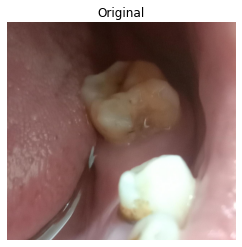

In [7]:
image = cv2.imread('./image/teeth.jpg')

# Show Image

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title('Original')
plt.imshow(rgb_image)

In [12]:
# Upscaling Image with Bicubic Interpolation
ratio = 2
a = -1/2
bicubicInterpolationUpscaled = bicubicInterpolation(rgb_image, ratio, a)

Start bicubic interpolation
It will take a little while...


In [13]:
cv2.imwrite('bicubic.png', bicubicInterpolationUpscaled)

True

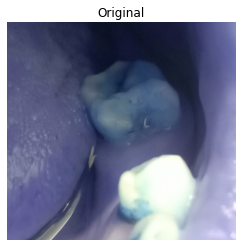

In [9]:
image = cv2.imread('./interpolated//bicubic.png')

# Show Image

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title('Original')
plt.imshow(rgb_image)

In [42]:
kernelSize = 3
sigmaSize = 3

# Median Filtered

median_filtered_image = medBlur(bicubicInterpolationUpscaled, 9)
plt.axis('off')
plt.title('Median Filtered Image')
plt.imshow(median_filtered_image)

# median_filtered_image

error: OpenCV(4.7.0) D:/a/opencv-python/opencv-python/opencv/modules/imgproc/src/median_blur.simd.hpp:880: error: (-215:Assertion failed) src.depth() == CV_8U && (cn == 1 || cn == 3 || cn == 4) in function 'cv::opt_AVX2::medianBlur'


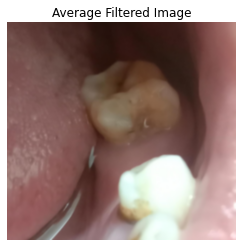

In [37]:
# Average Filtered

average_filtered_image = averageFilter(median_filtered_image, 9)
plt.axis('off')
plt.title('Average Filtered Image')
plt.imshow(average_filtered_image)

# average_filtered_image

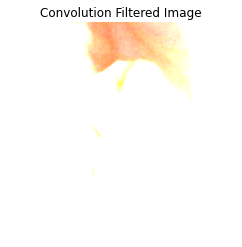

In [38]:
# Convolution Filtered

# convolution_filtered_image = convolutionFilter(median_filtered_image)
# plt.axis('off')
# plt.title('Convolution Filtered Image')
# plt.imshow(convolution_filtered_image)